In [1]:
from qiskit import *
import numpy as np
import random

In [2]:
n_qubits = 10 #number of qubits that Alice sends to Bob
eve_is_listening = True 

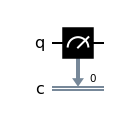

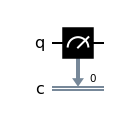

In [3]:
#visualization of the circuit used for the measurement
circuit1 = QuantumCircuit(1,1)
#measure in the computational basis
circuit1.measure(0,0)
%matplotlib inline
circuit1.draw('mpl')

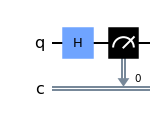

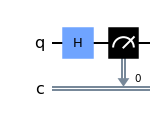

In [4]:
circuit2 = QuantumCircuit(1,1)
#measure in the hadamard basis
circuit2.h(0)
circuit2.measure(0,0)
%matplotlib inline
circuit2.draw('mpl')

In [5]:
simulator=Aer.get_backend('statevector_simulator')

#choice of the type of measurement, either the computational basis or the hadamard basis
def gate_choice(): 
    list = np.zeros((2, n_qubits))
    for i in range(0, n_qubits):
        basis = random.randint(0,1)
        list[0][i] = 0 if basis == 0 else 1
    return list

#measure in the basis chosen
def measure(list: int, circuit: qiskit): 
    if list == 0:
        #measure in the computational basis
        circuit.measure(0,0)
    else:
        #measure in the hadamard basis
        circuit.h(0)
        circuit.measure(0,0)

    result=execute(circuit, backend=simulator).result()
    statevector=result.get_statevector()
    return int(statevector[0].real)

def check(a_list: np.ndarray, b_list: np.ndarray):
    S = [] #codepad
    if len(a_list[0]) != len(b_list[0]):
        print("The lists must have the same length")
        return 0
    for i in range(0, len(a_list[0])):
        if a_list[0][i] == b_list[0][i]:
            if a_list[1][i] == b_list[1][i]:
                S.append(int(b_list[1][i]))
            else:
                print("Be careful! Someone is listening to your conversation.")
                return True
    print("\nThe codepad is: ", S)
    return True

In [6]:
Alice_list = gate_choice()
Alice_old_list = Alice_list
Bob_list = gate_choice()
Eve_list = gate_choice()

for i in range(0, n_qubits):
    circuit = QuantumCircuit(1,1)

    Alice_list[1][i] = measure(Alice_list[0][i], circuit)
    Alice_old_list[1][i] = Alice_list[1][i]
    if eve_is_listening:
        Alice_list[1][i] = measure(Eve_list[0][i], circuit)
        Eve_list[1][i] = Alice_list[1][i]
    
    Bob_list[1][i] = measure(Bob_list[0][i], circuit)

check(Alice_list, Bob_list)

if eve_is_listening:
    print("Alice's initial list is:\n", Alice_old_list)
    print("\nAlice's new list is:\n", Alice_list)
    print("\nEve's list is:\n", Eve_list)
else:
    print("Alice's list is:\n", Alice_old_list)
print("\nBob's list is:\n", Bob_list)

Be careful! Someone is listening to your conversation.
Alice's initial list is:
 [[1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]]

Alice's new list is:
 [[1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]]

Eve's list is:
 [[1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]]

Bob's list is:
 [[0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 0. 1.]]


In [7]:
#take only the qubits measured in the same state for comparison
length = len(Alice_list[0])
for i in range(1,length + 1):
    j = length - i 
    if Alice_list[0][j] != Bob_list[0][j]:
        Alice_list = np.delete(Alice_list, j, 1)
        Alice_old_list = np.delete(Alice_old_list, j, 1)
        Eve_list = np.delete(Eve_list, j, 1)
        Bob_list = np.delete(Bob_list, j, 1)

print("Alice's initial list is:\n", Alice_old_list)
print("\nAlice's new list is:\n", Alice_list)
print("\nEve's list is:\n", Eve_list)
print("\nBob's list is:\n", Bob_list)

Alice's initial list is:
 [[0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]]

Alice's new list is:
 [[0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]]

Eve's list is:
 [[1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1.]]

Bob's list is:
 [[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1.]]
